# NLP Group Project

In [1]:
#imports
import numpy as np
import pandas as pd
import prepare as pr
import explore as ex
import modeling as mod
import warnings
warnings.filterwarnings('ignore')

# Project Description:
Github is an online version control system that stores your code history. Repsositories are made to store different files that are written in various programming languages and named; usually based on what is inside the repository. The format for the repository titles are user_name/title. A github search query was made for COVID-19 and repository file titles were scraped and stored in a .json file. Natural Language Processing was applied to the README files in each repository and words were analyzed. A machine learning algoritm was applied to the information obtained from the natural language processing statifying on programming language in order to predict primary programming language of repository.

# Project Goals:
* Explore words and frequencies of covid-19 README's.
* Develop a machine learning model to predict `language`
* Deliver a final report to stakeholders

In [2]:
#acquiring and preparing data
df=pd.read_json('data.json')

In [3]:
#a look at the data
df.head(3)

,repo,language,readme_contents
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,# Bayesian inference and forecast of COVID-19\...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,# COVID-19_TRACKER_HTML_CSS_JAVASCRIPT\nCOVID-...
2,joanby/covid19,HTML,


# Data Dictionary:

| Feature | Definition |
|:--------|:-----------|
|repo| The file path of the repository on github.|
|language| The programming language that the readme of the repository is written in.|
|readme_contents| The raw contents of the readme for the repository.|
|stemmed| The contents of the readme after they have been stemmed.|
|lemmatized| The contents of the readme after they have been lemmatized.|

#  Explore Preperation:
* Data was prepared for explore:
    * Removed blank README files:
        * 4 repos had README files but contained no contents ("") so they were removed
    * Data was:
        * stop words were removed
        * stemmed
        * lemmatized
        * tokenized
    * `language` was binned:
        * Took the top 5 languages and kept them unique and all other languages used less than them were catagorized as 'other'
    * Data was split; stratifying on `language`

In [4]:
#preparing the data
df=pr.prep_data(df, column='readme_contents', extra_words=['covid19', 'coronavirus'])

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>What are the top languages of READMEs from repos that focus on COVID-19?</dt>
    </dl>
</div>

In [5]:
#question 1 function
ex.ex_q1(df)

Python              38
JavaScript          37
Jupyter Notebook    30
HTML                20
R                    9
TypeScript           7
Kotlin               7
Vue                  5
Dart                 3
Ruby                 3
PHP                  2
TeX                  2
Go                   2
Stan                 1
C#                   1
Svelte               1
Java                 1
SCSS                 1
PowerShell           1
TSQL                 1
Objective-C          1
CSS                  1
Name: language, dtype: int64

In [6]:
#separating out the languages into its own column
df=pr.seperate_language(df)
df['language'].value_counts()

others              69
Python              38
JavaScript          37
Jupyter Notebook    30
HTML                20
R                    9
Name: language, dtype: int64

In [7]:
#looking at the data
df.head()

,repo,language,clean,stemmed,lemmatized
0,Priesemann-Group/covid19_inference_forecast,Jupyter Notebook,bayesian inference forecast documentation stat...,bayesian infer forecast document statushttpsre...,bayesian inference forecast documentation stat...
1,CodeExplainedRepo/COVID-19_TRACKER_HTML_CSS_JA...,JavaScript,covid19trackerhtmlcssjavascript html5 css3 jav...,covid19trackerhtmlcssjavascript html5 css3 jav...,covid19trackerhtmlcssjavascript html5 css3 jav...
2,joanby/covid19,HTML,,,
3,sambreen27/covid19,JavaScript,simple reactjs app displays latest stats insta...,simpl reactj app display latest stat instal gi...,simple reactjs app display latest stats instal...
4,SJang1/2021-korea-covid-19-remaining-vaccine-m...,Python,code archived 2021 9 22 koreacovid19remainingv...,code archiv 2021 9 22 koreacovid19remainingvac...,code archived 2021 9 22 koreacovid19remainingv...


<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>What are the top 20 words in all of the READMEs?</dt>
    </dl>
    <header>
    <h2>Exploration Question 3:</h2>
    </header>
    <dl>
        <dt>How often do common words occur in each programming language?</dt>
    </dl>
</div>

In [8]:
#splitting the data
train, val, test=ex.tts(df)

In [9]:
#question 2 and 3 function
ex.explore_q2(train)

,all,other,js,py,jn,html,r
td,1512,56,20,8,0,1428,0
data,1100,343,46,399,167,83,62
styletextalignleft,672,0,0,0,0,672,0
de,547,102,1,19,370,4,51
1,526,451,5,21,39,4,6
br,475,388,0,83,3,1,0
2020,435,376,0,10,17,19,13
arxiv,386,385,0,1,0,0,0
tr,346,20,6,8,0,312,0
case,249,104,11,53,35,21,25


**Takeaway**  
* Some words favor a specific language
* 'styletextalignleft' only occurs in HTML READMEs

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 4:</h2>
    </header>
    <dl>
        <dt>What words are more common in READMEs across multiple programming langauges?</dt>
    </dl>
</div>

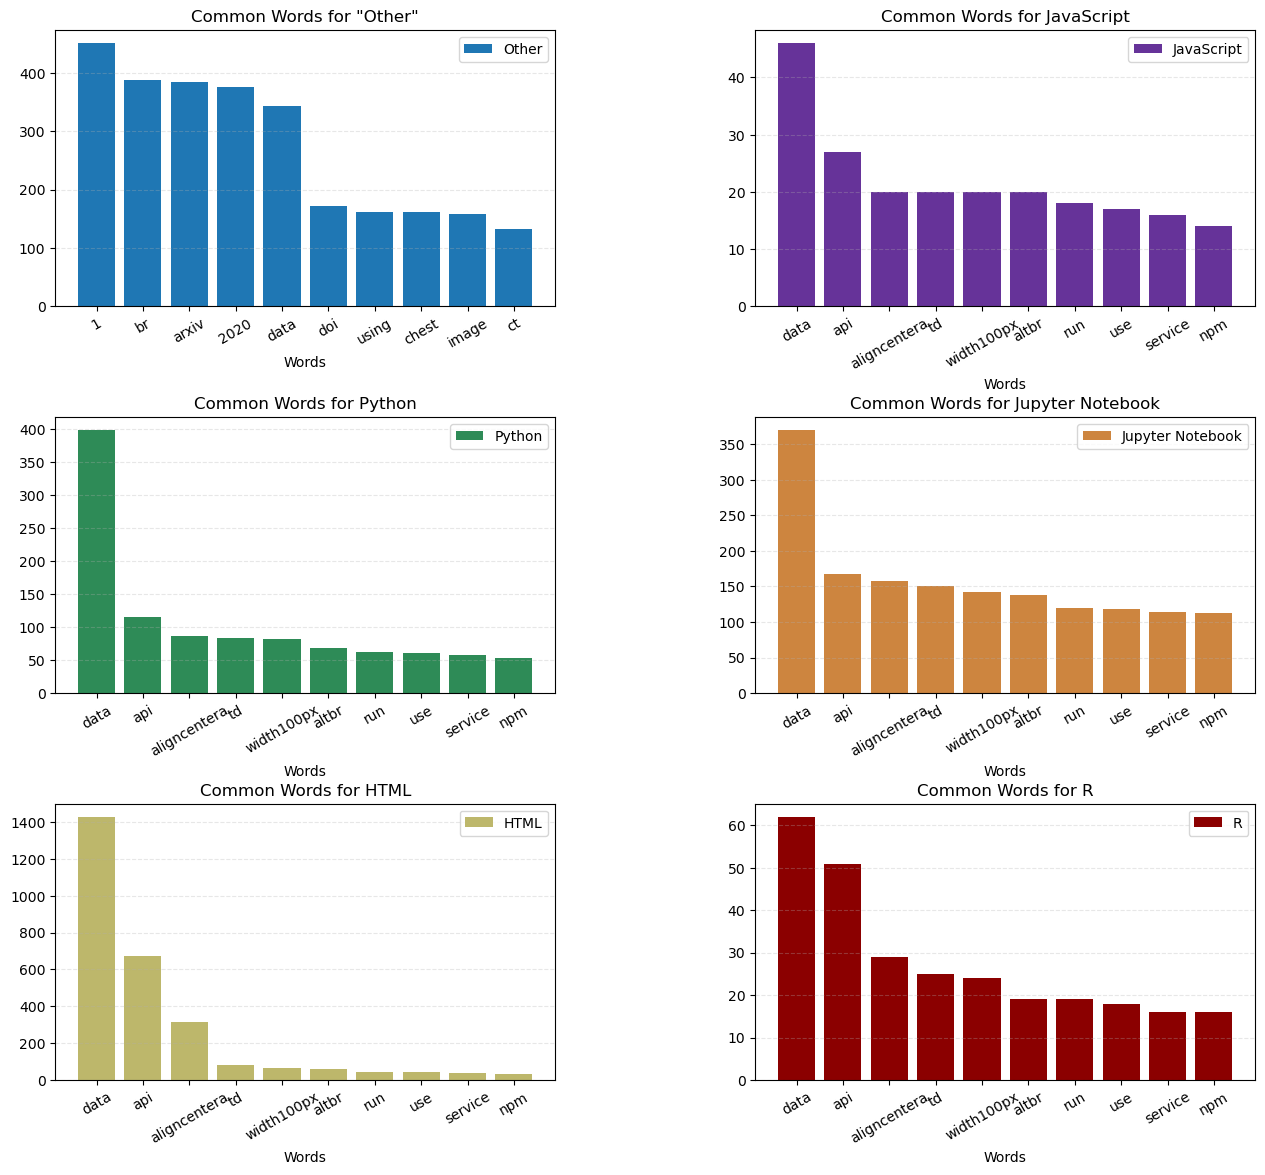

In [10]:
#question 4 visualizations
ex.explore_plots(train)

**Takeaway**  
* The top ten words for most of these languages are the same. This could make it harder to predict the correct language from a README

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 5:</h2>
    </header>
    <dl>
        <dt>What words have the highest Inverse Document Frequency (IDF)?</dt>
    </dl>
</div>

In [11]:
#question 4 visualizations
ex.get_top_idf_words(train, 10)

,word,idf_score
0,00,1.0
1,000,1.0
2,0000,1.0
3,001,1.0
4,001030,1.0
5,002,1.0
6,0025httpspypiorgprojectsentimentanalysisspanish,1.0
7,004,1.0
8,00406376,1.0
9,00bncbitaxonomynotebooksdataprep00bncbitaxonom...,1.0


**Takeaway**
* These "words" are all unique
* Because of the high idf, these values would not contribute much when making predictions

<div class="alert alert-info">
    <header>
    <h2>Exploration Summary</h2>
    </header>
    <dl>
        <dd>- Languages share similar syntax.</dd>
        <dd>- Even though there are some distinct wording, they don't account for all data in the dataset.</dd>
        <dd>- Top words for several languages are the same.</dd>
    </dl>
</div>

In [12]:
#splitting the data and giving baseline
X_train, y_train, X_val, y_val, X_test, y_test = mod.split_cv_models(df, 'lemmatized')

In [13]:
# baseline model
baseline = mod.baseline_model(df, 'lemmatized')
baseline

The baseline accuracy is 33.80%


In [14]:
#best models
mod.models(df, 'lemmatized')

The baseline accuracy is 33.80%


,model,train_accuracy,validate_accuracy
1,KNN,0.612676,0.419355
0,Decision Tree,0.471831,0.387097
2,Logistic Regression,0.802817,0.354839
4,Baseline,0.338028,0.338028
3,Random Forest,0.338028,0.322581


In [15]:
#running the test data through the model
mod.best_model(df, 'lemmatized')

The baseline accuracy is 33.80%


,model,train_accuracy,validate_accuracy,test_accuracy
0,KNN,0.612676,0.419355,0.433333
1,baseline,0.338028,0.338028,0.338028


<div class="alert alert-info">
    <header>
    <h2>Modeling Summary</h2>
    </header>
    <dl>
        <dd>- The knn was the top performing model.</dd>
        <dd>- All models seemed to overfit to varying degree. Train and validate performed well in some cases, but the test did not perform well on the final model.</dd>
    </dl>
    <header>
    <h2>Conclusion</h2>
    </header>
        <dl>
        <dd>- With 199 repos, it was difficult to predict language.</dd>
        <dd>- Additional data manipulation should be done to attempt to create a better model.</dd>
        <dd>- There are distinct words for each programing language, but still may not account for all README files.</dd>
    <header>
    <h2>Next Steps</h2>
    </header>
        <dd>- Additional steps would include adding more repos and README files to the dataset. We also could try to filter out some of the "noise" from common words among all README files to prioritize more unique words. We would explore different ways to group the data by language that may influence the outcome of modeling. Try modeling with the highest and lowest idf words removed.</dd>
    </dl>
</div>